In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [16]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
data['Taxable.Income'] = pd.cut(x=data['Taxable.Income'],bins=[0,30000,100000], labels=['risky','good'], right = False)
data['Taxable.Income']

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [17]:
data['Taxable.Income'].value_counts()

good     476
risky    124
Name: Taxable.Income, dtype: int64

In [18]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['Taxable.Income'] = label_encoder.fit_transform(data['Taxable.Income'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [19]:
data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972,0.004830
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.004830,-0.040098,-0.094559,1.000000


In [20]:
# dropping column taxable_income
data1 = data.drop('Taxable.Income', axis = 1)
data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [21]:
# Dividing data into independent variables and dependent variable
x = data1.iloc[:,0:]
y = data['Taxable.Income']

In [22]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

In [24]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=40)

In [25]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
454,0,1,29602,15,1
82,0,0,111068,26,1
146,0,0,57931,28,1
298,0,2,119904,21,1
331,1,1,60999,15,1
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [26]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
78,1,0,143153,0,0
380,1,1,197699,2,0
199,1,1,145744,9,1
101,1,1,50490,20,1


In [27]:
y_train

454    0
82     0
146    0
298    0
331    1
      ..
440    0
165    0
7      0
219    1
326    1
Name: Taxable.Income, Length: 402, dtype: int64

In [28]:
y_test

159    0
307    0
253    0
528    0
137    1
      ..
78     0
380    0
199    1
101    0
438    1
Name: Taxable.Income, Length: 198, dtype: int64

In [29]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

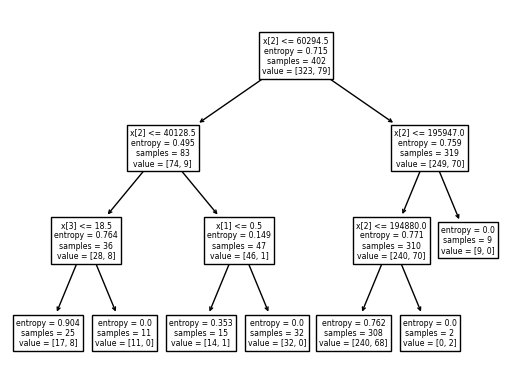

In [30]:
#PLot the decision tree
tree.plot_tree(model);

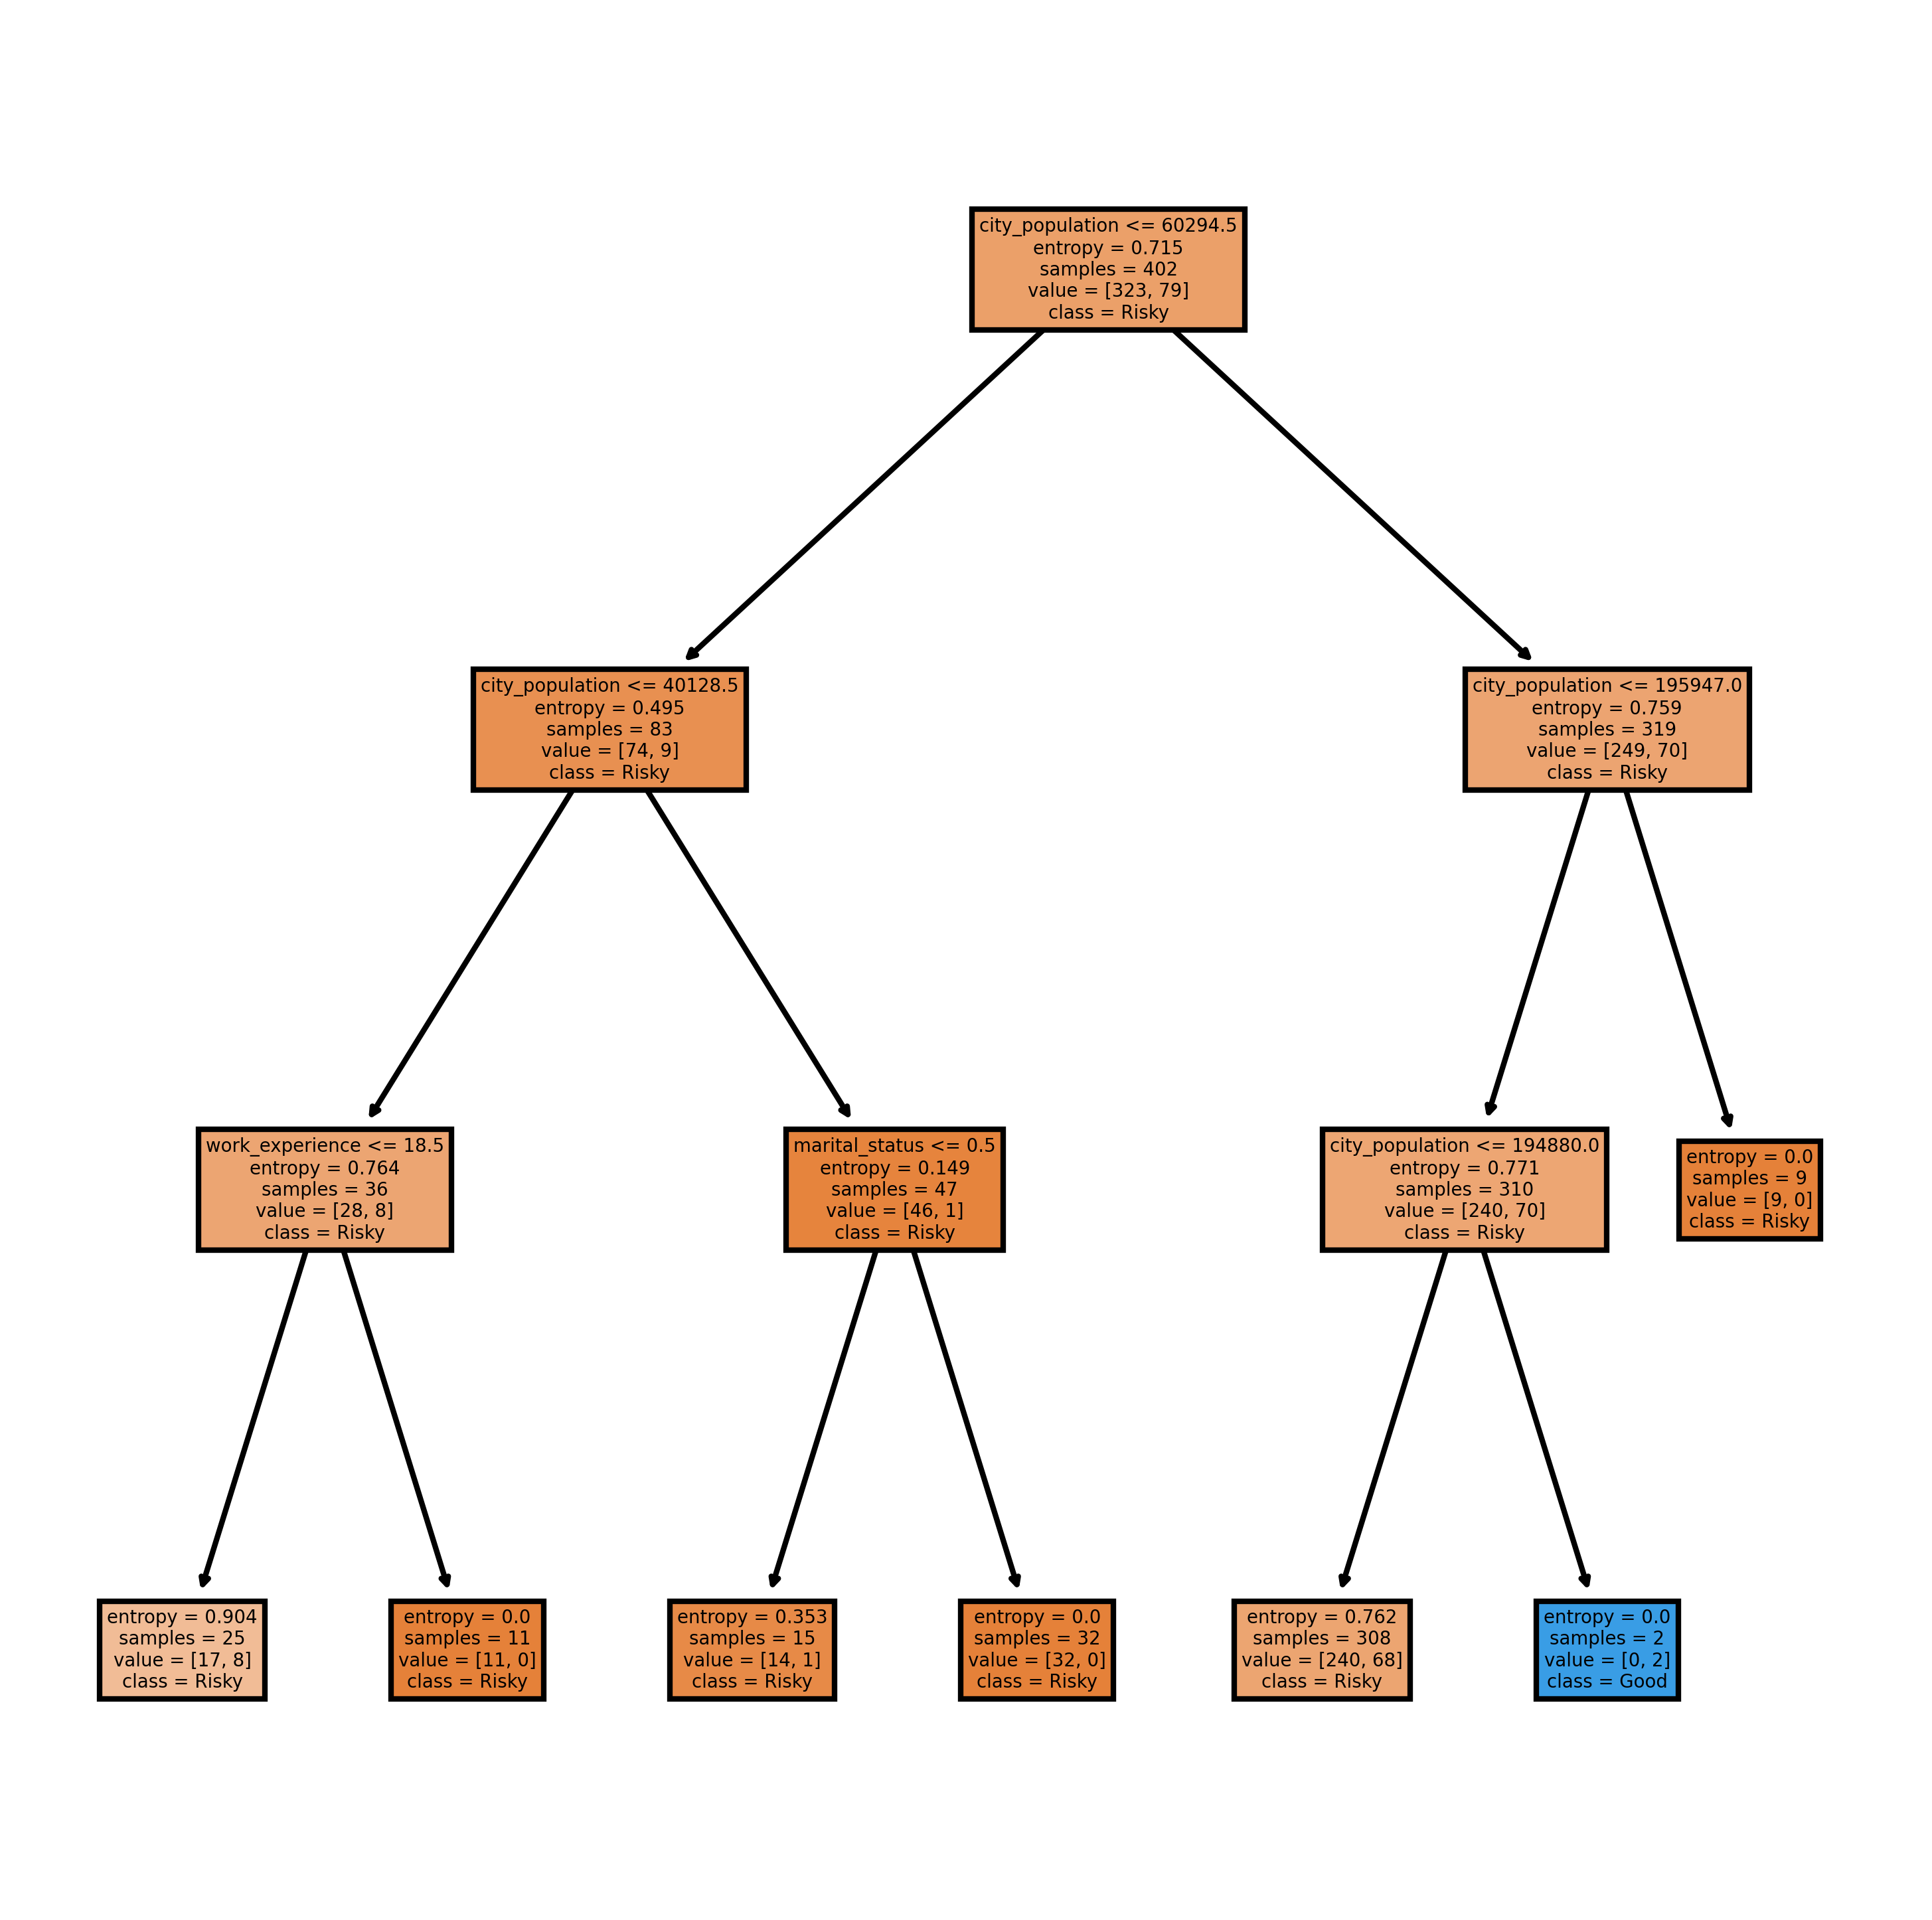

In [31]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [32]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

0    197
1      1
dtype: int64

In [33]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1
Taxable.Income,,
0,152,1
1,45,0


In [35]:
# Accuracy
np.mean(preds==y_test)

0.7676767676767676

In [36]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini

DecisionTreeClassifier(max_depth=3)

In [37]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

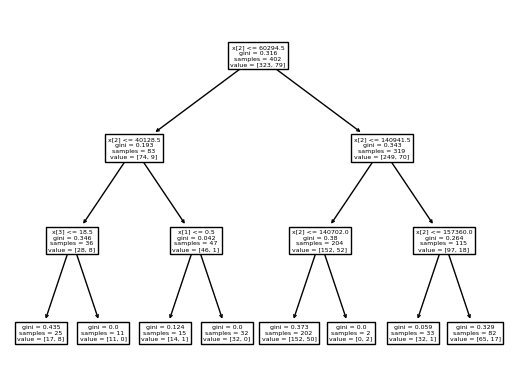

In [38]:
# Plotting Decision tree
tree.plot_tree(model_gini);

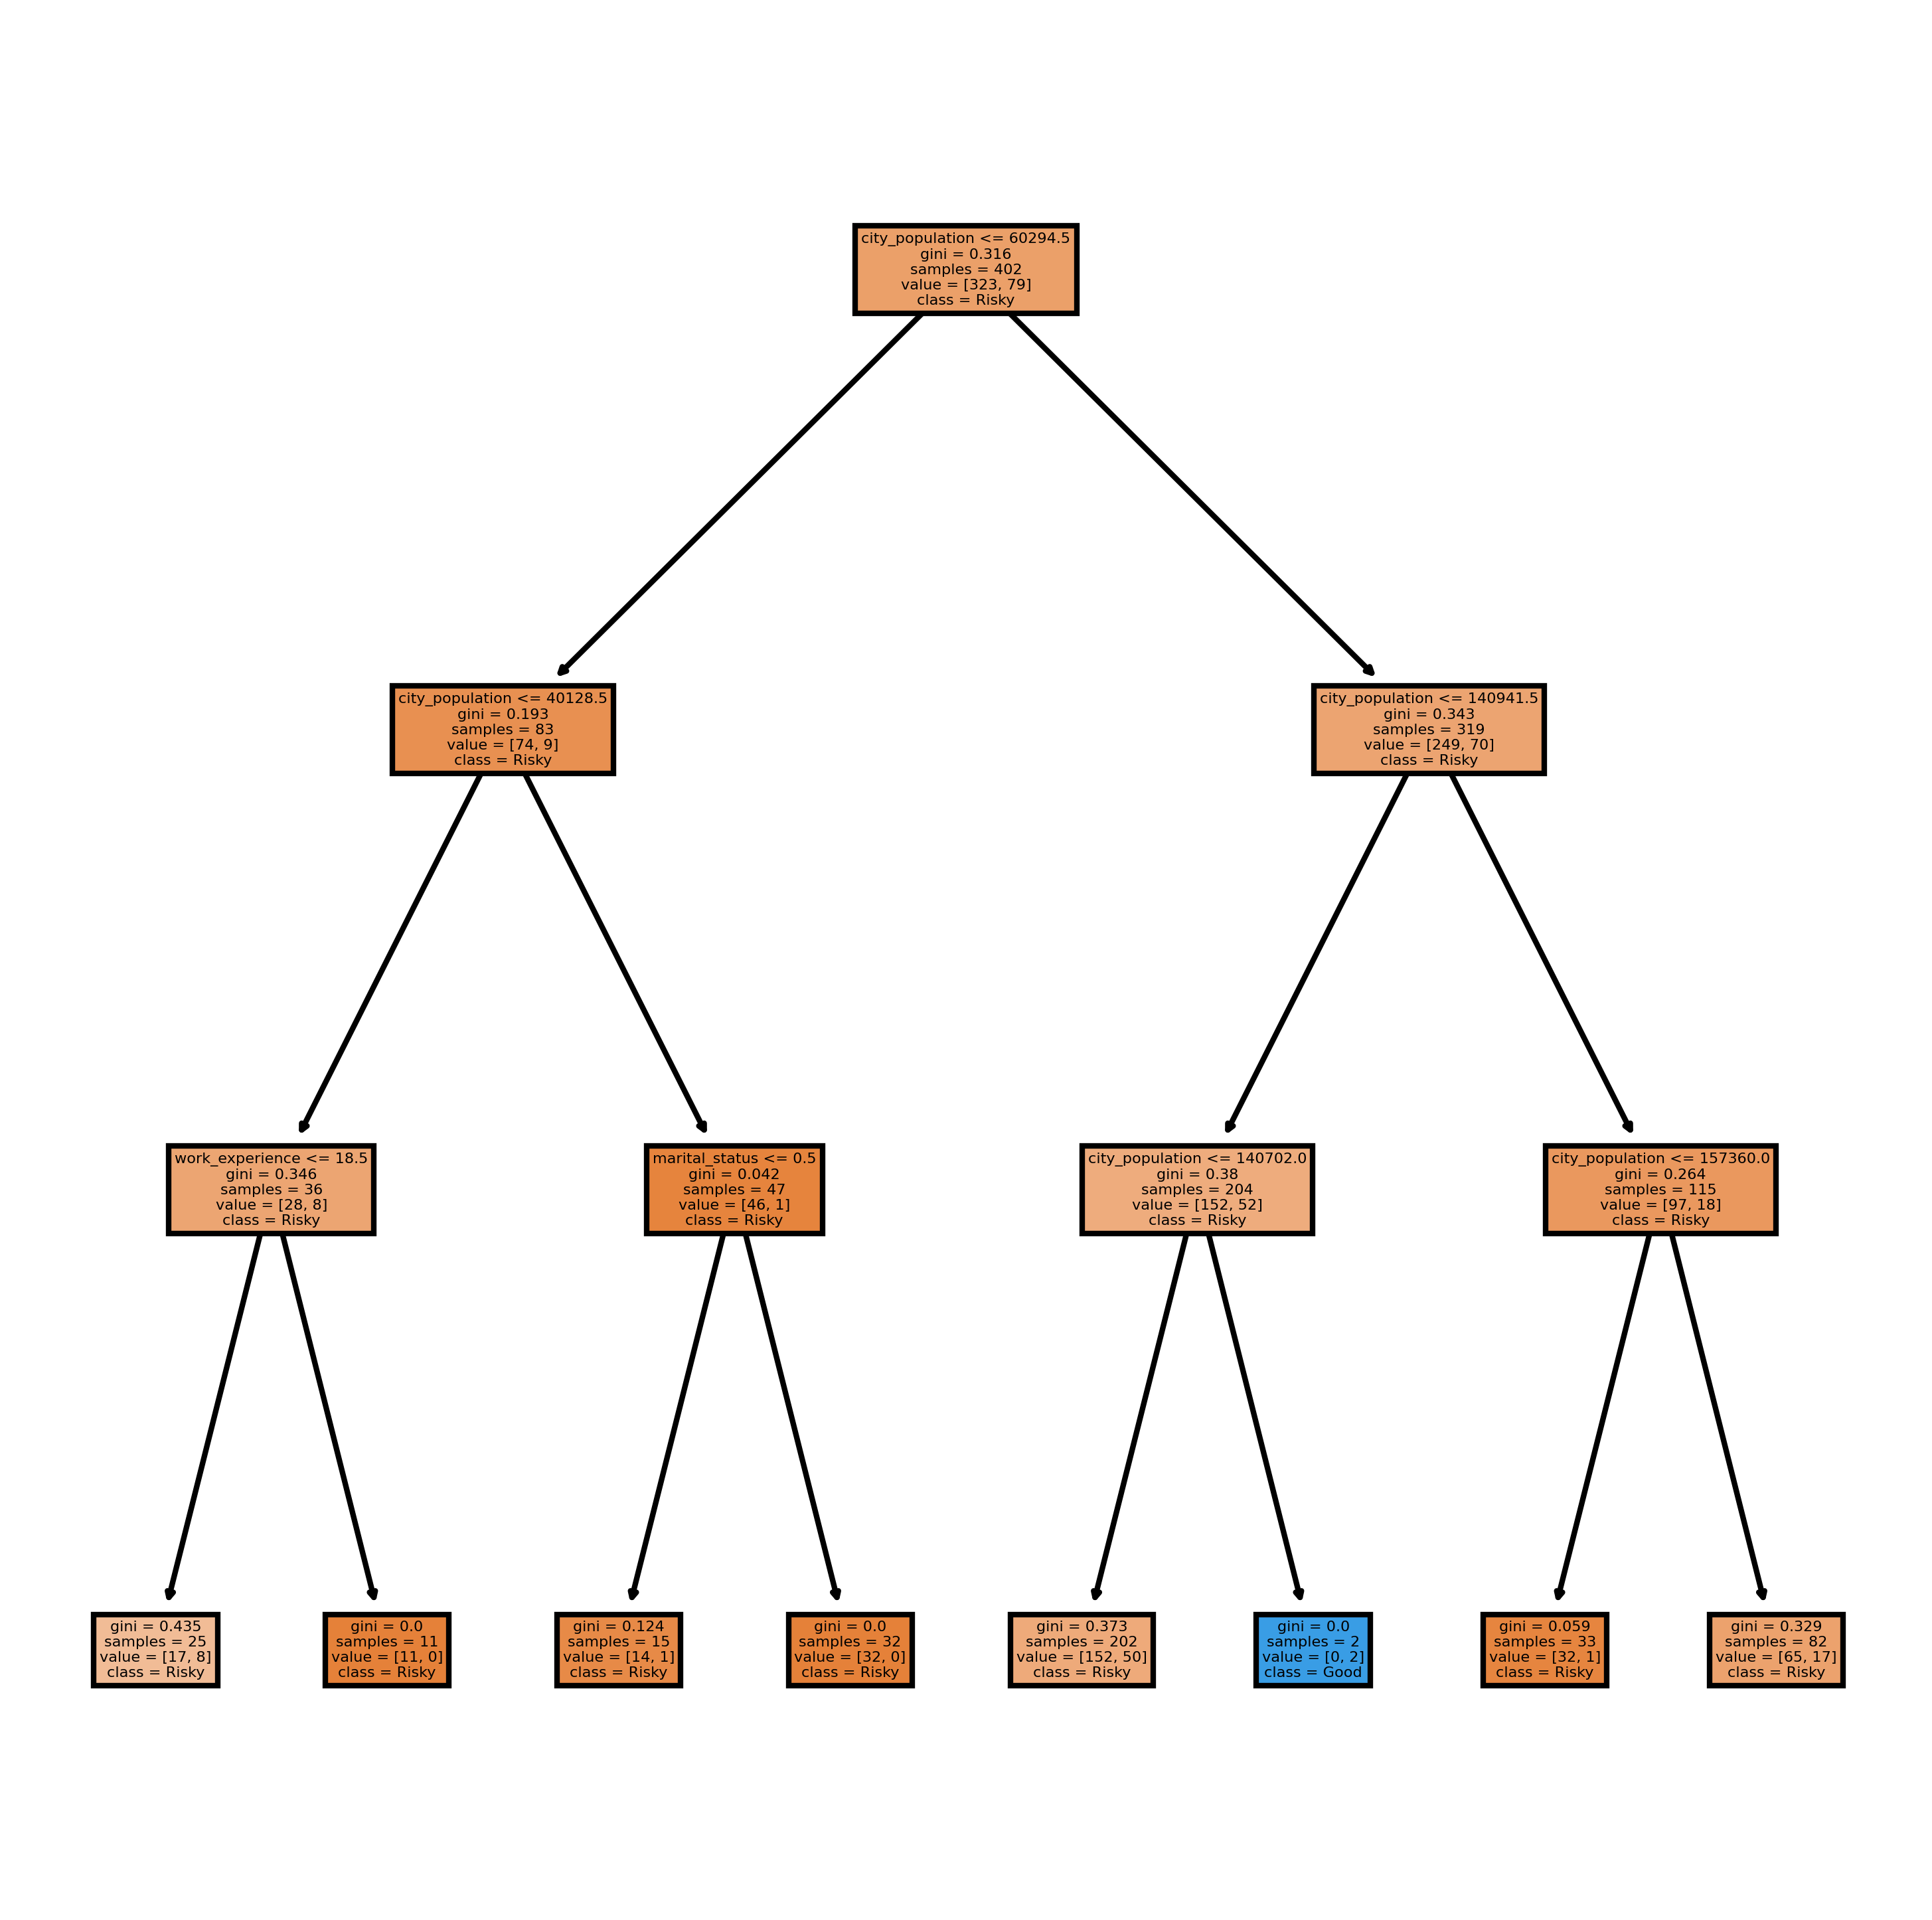

In [39]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [40]:
# Predicting Data
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

0    198
dtype: int64

In [41]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0
Taxable.Income,
0,153
1,45


In [43]:
# Checking accuracy of model
model_gini.score(x_test, y_test)

0.7727272727272727